<a href="https://www.kaggle.com/code/indrajithsudusinghe/ridge-regression-explained-alpha-r-overfitting?scriptVersionId=289504000" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# What you will learn from this notebook\

* Alpha(α) vs R²

* Training vs Validation R²

* Overfitting → Good fit → Underfitting visually

* Ridge Regression core idea

# Step 1: Import libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


# Step 2: Create suitable STUDY dataset (important)

### Non-linear data + noise 

In [3]:
np.random.seed(42)

X = np.linspace(-3, 3, 120).reshape(-1, 1)
y = 0.5 * X**3 - X**2 + 2*X + np.random.normal(0, 3, size=X.shape)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


#### 📌 This data is perfect for seeing overfitting & Ridge effect

# Step 3: Define Alpha values to study

In [4]:
alphas = [0, 0.001, 0.01, 0.1, 1, 10, 100]

train_r2 = []
test_r2 = []


# Step 4: Ridge Regression with Polynomial Features

In [5]:
for alpha in alphas:
    model = Pipeline([
        ("poly", PolynomialFeatures(degree=10, include_bias=False)),
        ("ridge", Ridge(alpha=alpha))
    ])
    
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_r2.append(r2_score(y_train, y_train_pred))
    test_r2.append(r2_score(y_test, y_test_pred))


# Step 5: Plot R² vs Alpha (MAIN LEARNING GRAPH)

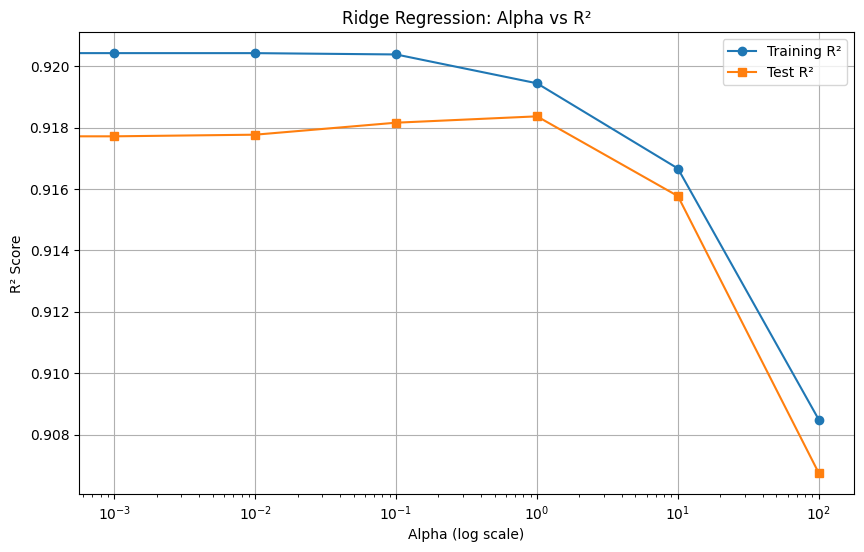

In [6]:
plt.figure(figsize=(10,6))

plt.plot(alphas, train_r2, marker='o', label="Training R²")
plt.plot(alphas, test_r2, marker='s', label="Test R²")

plt.xscale("log")
plt.xlabel("Alpha (log scale)")
plt.ylabel("R² Score")
plt.title("Ridge Regression: Alpha vs R²")
plt.legend()
plt.grid(True)

plt.show()


##  How to READ this graph (VERY IMPORTANT)

### Alpha ≈ 0

Training R² ↑

Test R² ↓
👉 Overfitting

### Alpha = middle values (0.1 – 1)

Train ≈ Test

Test R² max
👉 Best model

### Alpha very large

Both R² ↓
👉 Underfitting

## Coefficients shrinking ( Optional (Advanced but useful))

In [7]:
coef_df = pd.DataFrame()

for alpha in alphas:
    ridge = Pipeline([
        ("poly", PolynomialFeatures(degree=10, include_bias=False)),
        ("ridge", Ridge(alpha=alpha))
    ])
    
    ridge.fit(X_train, y_train)
    
    # ✅ FIX: make coefficients 1D
    coef_df[f"alpha={alpha}"] = ridge.named_steps["ridge"].coef_.ravel()

coef_df


,alpha=0,alpha=0.001,alpha=0.01,alpha=0.1,alpha=1,alpha=10,alpha=100
0,3.880406,3.877890,3.855497,3.653715,2.650062,1.349983,0.431177
1,-3.434673,-3.429512,-3.383860,-2.994493,-1.558947,-0.565645,-0.155319
2,-1.841272,-1.838177,-1.810638,-1.563324,-0.376223,0.624949,0.438390
3,1.749921,1.745607,1.707451,1.382482,0.205179,-0.374763,-0.195726
4,0.927902,0.926747,0.916468,0.824393,0.392228,0.134388,0.399863
5,-0.574886,-0.573574,-0.561966,-0.463169,-0.108572,0.021657,-0.123342
6,-0.137291,-0.137123,-0.135636,-0.122337,-0.060918,-0.033729,-0.085505
7,0.083393,0.083227,0.081760,0.069276,0.024703,0.012115,0.037697
8,0.006757,0.006748,0.006675,0.006020,0.003032,0.002023,0.004922
9,-0.004205,-0.004198,-0.004132,-0.003575,-0.001590,-0.001150,-0.002515


# Add feature names:

In [8]:
feature_names = [f"x^{i}" for i in range(1, 11)]
coef_df.index = feature_names
coef_df


,alpha=0,alpha=0.001,alpha=0.01,alpha=0.1,alpha=1,alpha=10,alpha=100
x^1,3.880406,3.877890,3.855497,3.653715,2.650062,1.349983,0.431177
x^2,-3.434673,-3.429512,-3.383860,-2.994493,-1.558947,-0.565645,-0.155319
x^3,-1.841272,-1.838177,-1.810638,-1.563324,-0.376223,0.624949,0.438390
x^4,1.749921,1.745607,1.707451,1.382482,0.205179,-0.374763,-0.195726
x^5,0.927902,0.926747,0.916468,0.824393,0.392228,0.134388,0.399863
x^6,-0.574886,-0.573574,-0.561966,-0.463169,-0.108572,0.021657,-0.123342
x^7,-0.137291,-0.137123,-0.135636,-0.122337,-0.060918,-0.033729,-0.085505
x^8,0.083393,0.083227,0.081760,0.069276,0.024703,0.012115,0.037697
x^9,0.006757,0.006748,0.006675,0.006020,0.003032,0.002023,0.004922
x^10,-0.004205,-0.004198,-0.004132,-0.003575,-0.001590,-0.001150,-0.002515


## 🧠 ONE-LINE STUDY SUMMARY 

### Alpha controls model complexity —
### small alpha → overfitting,
### large alpha → underfitting,
### middle alpha → best R² on test data